In [1]:
import pandas as pd

train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_test.csv')
train.head()

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,id
0,0,Female,Loyal Customer,54,Personal Travel,Eco,1068,3,4,3,...,5,5,3,5,3,5,3,47,22.0,NaN
1,2,Male,Loyal Customer,20,Personal Travel,Eco,1546,4,4,4,...,4,3,3,4,4,4,4,5,2.0,NaN
2,3,Male,Loyal Customer,59,Business travel,Business,2962,0,4,0,...,1,1,1,1,5,1,4,54,46.0,NaN
3,4,Male,Loyal Customer,35,Business travel,Eco Plus,106,5,4,4,...,5,2,1,5,4,4,5,130,121.0,NaN
4,5,Female,Loyal Customer,9,Business travel,Business,2917,3,3,3,...,4,4,4,5,4,3,4,0,0.0,NaN


In [2]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
train['scaling'] = mm.fit_transform(train['Flight Distance'].values.reshape(-1,1))

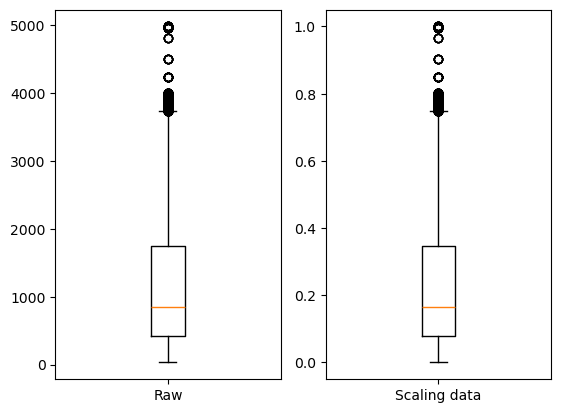

In [3]:
# 결과 시각화
import matplotlib.pyplot as plt

fig , ax = plt.subplots(1,2)
ax[0].boxplot(train['Flight Distance'])
ax[0].set_xticks([1])
ax[0].set_xticklabels(['Raw'])
ax[1].boxplot(train['scaling'])
ax[1].set_xticks([1])
ax[1].set_xticklabels(['Scaling data'])
plt.show()

In [4]:
mx = train['Flight Distance'].max()
mn = train['Flight Distance'].min()
train['scaling'] = train['Flight Distance'].apply(lambda x: (x - mn) / (mx - mn))

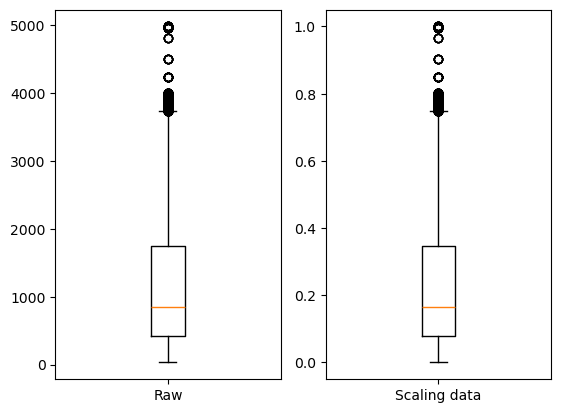

In [5]:
# 결과 시각화
import matplotlib.pyplot as plt

fig , ax = plt.subplots(1,2)
ax[0].boxplot(train['Flight Distance'])
ax[0].set_xticks([1])
ax[0].set_xticklabels(['Raw'])
ax[1].boxplot(train['scaling'])
ax[1].set_xticks([1])
ax[1].set_xticklabels(['Scaling data'])
plt.show()

In [14]:
train['age_scaling'] = mm.fit_transform(train['Age'].values.reshape(-1, 1))
test['age_scaling'] = mm.transform(test['Age'].values.reshape(-1,1))
test[['ID', 'age_scaling']]

,ID,age_scaling
0,1,0.269231
1,16,0.346154
2,17,0.205128
3,25,0.615385
4,27,0.474359
...,...,...
20776,103895,0.653846
20777,103896,0.025641
20778,103897,0.500000
20779,103900,0.358974


In [18]:
std_ = train['Age'].std()
mean_ = train['Age'].mean()

train['age_scaling'] = train['Age'].apply(lambda x: (x - mean_) / std_)

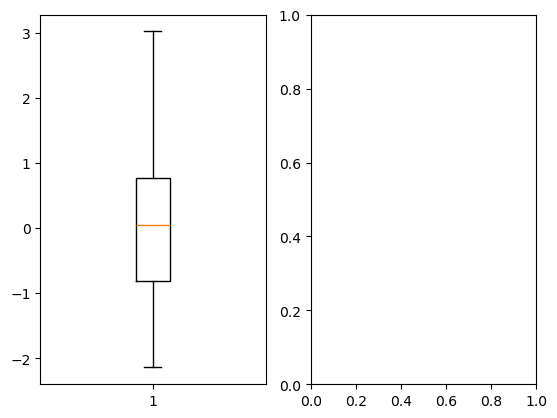

In [27]:
##결과 시각화
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,2)
ax[0].boxplot(train['age_scaling'])
ax[0].set_xticks([1])
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train['age_scaling'] = ss.fit_transform(train['Age'].values.reshape(-1,1))
test['age_scaling'] = ss.transform(test['Age'].values.reshape(-1,1))
test[['ID', 'age_scaling']]

,ID,age_scaling
0,1,-0.752215
1,16,-0.354927
2,17,-1.083288
3,25,1.035580
4,27,0.307219
...,...,...
20776,103895,1.234224
20777,103896,-2.010293
20778,103897,0.439649
20779,103900,-0.288712


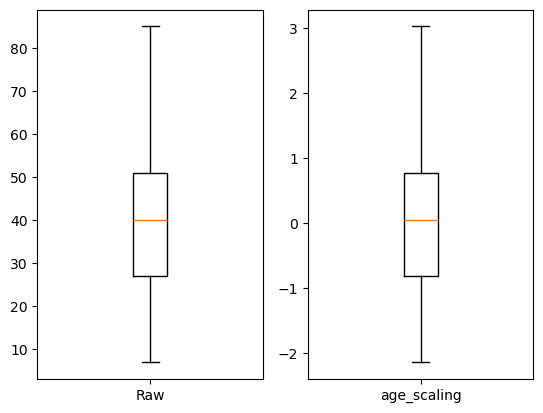

In [31]:
##결과 시각화
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,2)
ax[0].boxplot(train['Age'])
ax[0].set_xticks([1])
ax[0].set_xticklabels(['Raw'])
ax[1].boxplot(train['age_scaling'])
ax[1].set_xticks([1])
ax[1].set_xticklabels(['age_scaling'])
plt.show()